In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
game = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
game.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Dataset loaded and first 5 columns and rows are printed 

In [3]:
game.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

The above details shows that we don't have any null values in our dataset

In [4]:
col = game.columns
col

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [ ]:
for i in col:
    plt.figure(figsize=(10,5))
    sns.countplot(game[i])
    plt.show

In [ ]:
plt.figure(figsize = (12,6))
sns.pairplot(game)
plt.show()

In [ ]:
for i in col:
    plt.figure(figsize = (12,6))
    sns.scatterplot(x = 'W' , y = i , data = game)
    plt.show()

W          AxesSubplot(0.125,0.71587;0.0945122x0.16413)
R       AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
AB      AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
H       AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
2B      AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
3B      AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
HR      AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
BB        AxesSubplot(0.125,0.518913;0.0945122x0.16413)
SO     AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
SB     AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
RA     AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
ER     AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
ERA    AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
CG     AxesSubplot(0.805488,0.518913;0.0945122x0.16413)
SHO       AxesSubplot(0.125,0.321957;0.0945122x0.16413)
SV     AxesSubplot(0.238415,0.321957;0.0945122x0.16413)
E      AxesSubplot(0.351829,0.321957;0.0945122x0.16413)
dtype: object

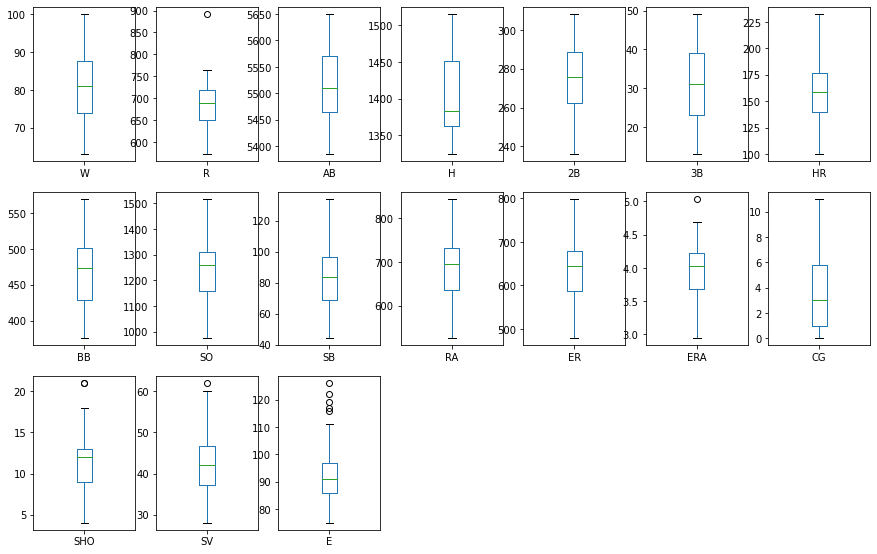

In [5]:
game.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

In [6]:
from scipy.stats import zscore
z_score = np.abs(zscore(game))
z_score.shape

(30, 17)

In [7]:
threshold = 3
print(np.where(z_score>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [8]:
game = game[(z_score<3).all(axis=1)]

In [9]:
game.shape

(29, 17)

In [10]:
(30-29)/30*100

3.3333333333333335

W
0.11901344569985461
No skewness is present


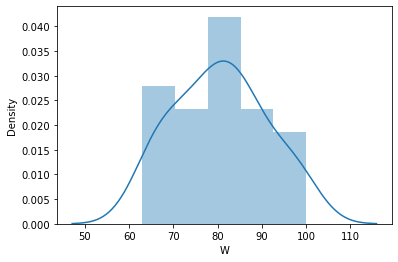

R
-0.21536363420992782
No skewness is present


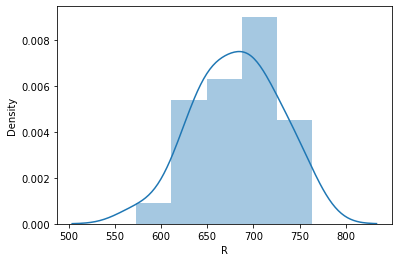

AB
0.16957316834729352
No skewness is present


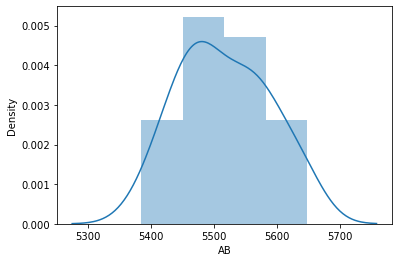

H
0.7837722117274881
Column is having skewness


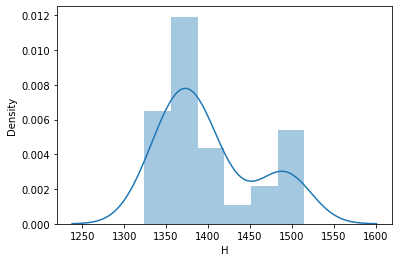

2B
-0.335303936110201
No skewness is present


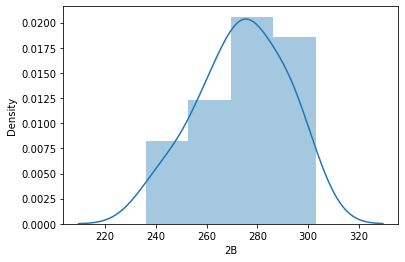

3B
0.09012434653848651
No skewness is present


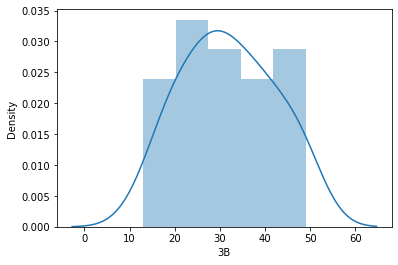

HR
0.45086158125803544
No skewness is present


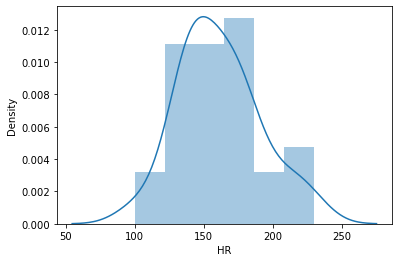

BB
0.15119282971519954
No skewness is present


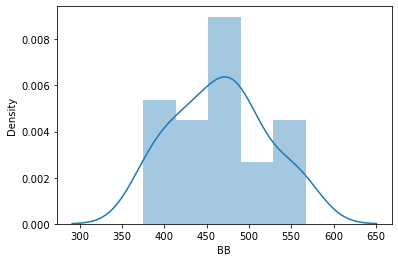

SO
-0.2338149185462262
No skewness is present


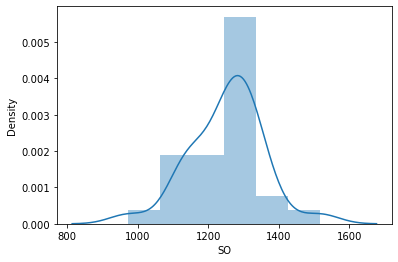

SB
0.4949657663368456
No skewness is present


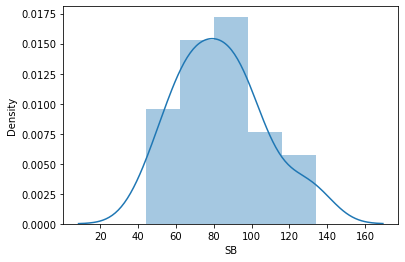

RA
0.018155177145956613
No skewness is present


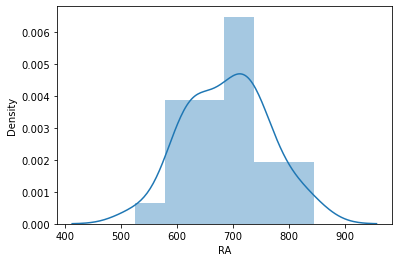

ER
0.018460990156758887
No skewness is present


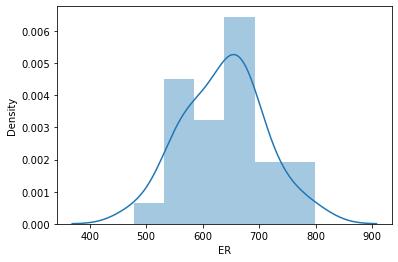

ERA
0.016693217783651695
No skewness is present


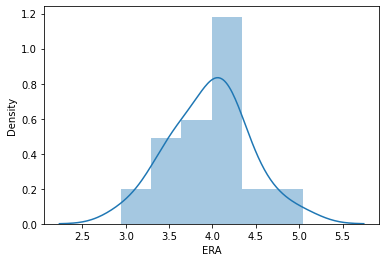

CG
0.8549795901105167
Column is having skewness


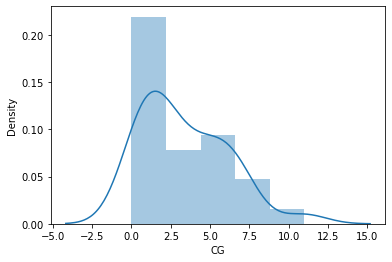

SHO
0.5269430585305683
No skewness is present


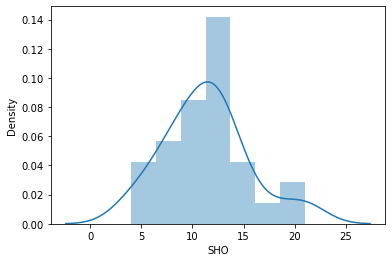

SV
0.6274804879503074
Column is having skewness


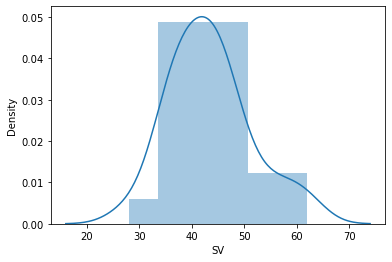

E
0.8402711976867623
Column is having skewness


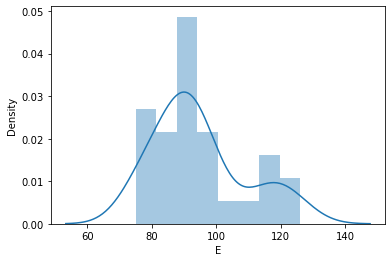

In [11]:
for col in game:
    print(col)
    print(game[col].skew())
    if (game[col].skew() > 0.55 or game[col].skew() < -0.55): 
        print("Column is having skewness")
    else:
        print("No skewness is present")
    
    plt.figure()
    sns.distplot(game[col])
    plt.show()

In [12]:
from scipy import stats
from scipy.stats import boxcox
col1 = game.columns

In [13]:
for i in col1:
    if (game[i].skew() > 0.55 or game[i].skew() < -0.55):
        print(i)

H
CG
SV
E


Graph before removing skewness AxesSubplot(0.125,0.125;0.775x0.755)
value after removing the skewness 0
New graph after removing the skewness:-


<AxesSubplot:xlabel='H', ylabel='Density'>

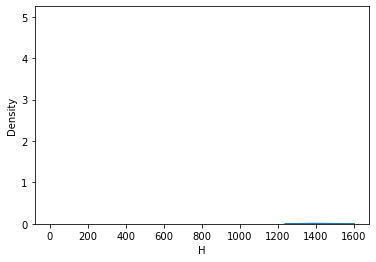

In [14]:

print("Graph before removing skewness", sns.distplot(game['H']))

game['H'] = stats.boxcox(game['H'])[0]
    
print("value after removing the skewness", game['H'].skew())
print("New graph after removing the skewness:-")
sns.distplot(game['H'])

In [15]:
game['CG'].skew()

0.8549795901105167

Graph before removing skewness AxesSubplot(0.125,0.125;0.775x0.755)
value after removing the skewness -0.2606778075812151
New graph after removing the skewness:-


<AxesSubplot:xlabel='CG', ylabel='Density'>

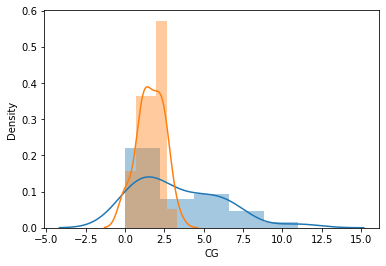

In [16]:
print("Graph before removing skewness", sns.distplot(game['CG']))

game['CG'] = np.sqrt(game['CG'])
    
print("value after removing the skewness", game['CG'].skew())
print("New graph after removing the skewness:-")
sns.distplot(game['CG'])

Graph before removing skewness AxesSubplot(0.125,0.125;0.775x0.755)
value after removing the skewness 0.37027995254293594
New graph after removing the skewness:-


<AxesSubplot:xlabel='SV', ylabel='Density'>

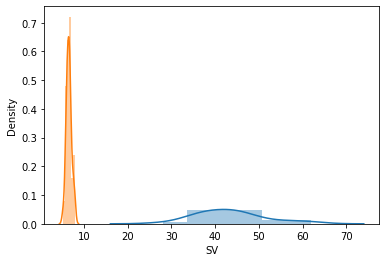

In [17]:
print("Graph before removing skewness", sns.distplot(game['SV']))

game['SV'] = np.sqrt(game['SV'])
    
print("value after removing the skewness", game['SV'].skew())
print("New graph after removing the skewness:-")
sns.distplot(game['SV'])

Graph before removing skewness AxesSubplot(0.125,0.125;0.775x0.755)
value after removing the skewness 0.06514996960967177
New graph after removing the skewness:-


<AxesSubplot:xlabel='E', ylabel='Density'>

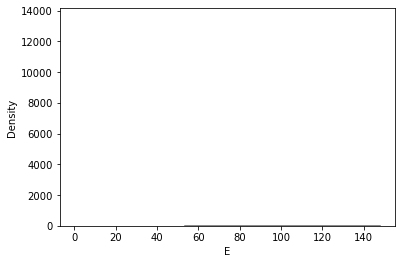

In [18]:
print("Graph before removing skewness", sns.distplot(game['E']))

game['E'] = stats.boxcox(game['E'])[0]
    
print("value after removing the skewness", game['E'].skew())
print("New graph after removing the skewness:-")
sns.distplot(game['E'])

We checked the outliers using box plot and removed the same using Zscore from the dataset. AFter we displayed the graohical representation of the distribution of data over columns uysing dustoplot and then we found that fe columns having skewness which we removed using the boxcox and other methods

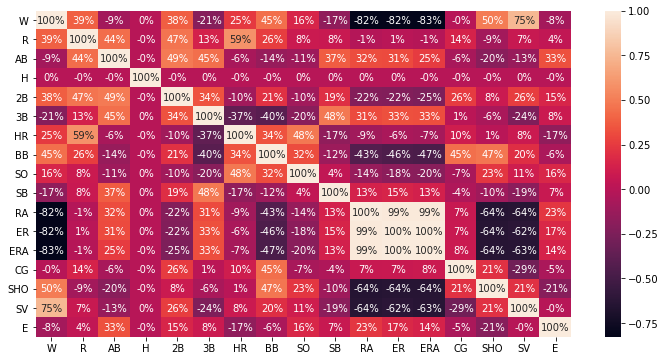

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(game.corr(), annot = True,fmt='.0%')
plt.show()

In [62]:
game.drop('RA', axis = 1, inplace =True)
game.drop('ER', axis = 1, inplace =True)
game.drop('ERA', axis = 1, inplace =True)

In [63]:
game.shape

(29, 14)

In [65]:
x = game.iloc[:,1:14]
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,724,5575,0.092247,300,42,139,383,973,104,1.414214,8,7.483315,0.546961
1,696,5467,0.092247,277,44,156,439,1264,70,1.414214,12,6.708204,0.546955
2,669,5439,0.092247,303,29,141,533,1157,86,3.316625,10,6.164414,0.546928
3,622,5533,0.092247,260,27,136,404,1231,68,2.645751,9,6.082763,0.546995
4,689,5605,0.092247,289,49,151,455,1259,83,2.645751,12,5.916080,0.546955


In [67]:
x.shape[1]

13

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))


#from sklearn.preprocessing import MinMaxScaler
#mc = MinMaxScaler()
#x = mc.fit_transform(x)

In [71]:
y = game['W']
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [72]:
dtc = DecisionTreeRegressor()
lr = LinearRegression()
svc = SVR()
rnd = RandomForestRegressor()

In [73]:
for i in range(0,3000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("AT random state",i,"the model performing good")

AT random state 2209 the model performing good


In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 50)
print(dtc.fit(x_train,y_train))

print(svc.fit(x_train,y_train))
print(rnd.fit(x_train,y_train))

DecisionTreeRegressor()
SVR()
RandomForestRegressor()


In [88]:
pred_dtc = dtc.predict(x_test)

pred_svc = svc.predict(x_test)
pred_rnd = rnd.predict(x_test)

After splitting the dataset we have assigned a variables for our ALgorithms. After that we chosse best random state for our Linear regression model. Then we proceeded to split the data to train and test phase and then we use fit function to fit the data to our various algorithms. 

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_dtc))
print('Means Squared Error',mean_squared_error(y_test,pred_dtc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_dtc)))
print('Model Score',r2_score(y_test,pred_dtc))

Error Calculations: -
Means absolute error 8.0
Means Squared Error 96.88888888888889
Root mean square 9.843215373488933
Model Score 0.32484514796971775


In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 2209)

print(lr.fit(x_train,y_train))
pred_lr = lr.predict(x_test)
print('Means absolute error', mean_absolute_error(y_test,pred_lr))
print('Means Squared Error',mean_squared_error(y_test,pred_lr))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Model Score',r2_score(y_test,pred_lr))

LinearRegression()
Means absolute error 4.721055655994651
Means Squared Error 32.32165596801395
Root mean square 5.685213801433852
Model Score 0.8084817751712414


In [79]:
print('Means absolute error for is', mean_absolute_error(y_test,pred_svc))
print('Means Squared Error for is',mean_squared_error(y_test,pred_svc))
print('Root mean square for is', np.sqrt(mean_squared_error(y_test,pred_svc)))
print('Model Score for is',r2_score(y_test,pred_svc))

Means absolute error for is 11.33733176434617
Means Squared Error for is 159.98109209908196
Root mean square for is 12.648363218182896
Model Score for is 0.052050588147356525


In [80]:
print('Means absolute error', mean_absolute_error(y_test,pred_rnd))
print('Means Squared Error',mean_squared_error(y_test,pred_rnd))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_rnd)))
print('Model Score',r2_score(y_test,pred_rnd))

Means absolute error 9.712222222222223
Means Squared Error 127.0815888888889
Root mean square 11.273047009965358
Model Score 0.2469927798098026


In [81]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Means absolute error', mean_absolute_error(y_test,predad))
print('Means Squared Error',mean_squared_error(y_test,predad))
print('Root mean square', np.sqrt(mean_squared_error(y_test,predad)))
print('Model Score',r2_score(y_test,predad))

Means absolute error 7.662698412698412
Means Squared Error 67.85155265810026
Root mean square 8.237205391278055
Model Score 0.5979534919307886


We choose certain model to predict our data. We can see that Linear Regression has the highest score. 

In [82]:
from sklearn.model_selection import GridSearchCV
parameters = { 'fit_intercept' :['True','False'],
               'normalize'  :['True','False'],
               'copy_X' :['True','False'],
               'n_jobs' :[100,200,300,400,500]   
             }

grid_cv = GridSearchCV(estimator=lr, param_grid = parameters)
grid_cv.fit(x_test, y_test)
best_para = grid_cv.best_params_
print(best_para)
best_result = grid_cv.best_score_
print(best_result)
print(round(best_result,2))

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 100, 'normalize': 'True'}
nan
nan


In [86]:
from sklearn.model_selection import cross_val_score

score_dtc=cross_val_score(dtc,x,y,cv=5)
print('\n')
print("Score for Decision Tree",score_dtc)
print(score_dtc.mean())
print(score_dtc.std())
print('------------------------')

score_lr=cross_val_score(lr,x,y,cv=5)
print(score_lr)
print(score_lr.mean())
print(score_lr.std())
print('------------------------')

score_svc=cross_val_score(svc,x,y,cv=5)
print(score_svc)
print(score_svc.mean())
print(score_svc.std())
print('------------------------')

score_rnd=cross_val_score(rnd,x,y,cv=5)
print(score_rnd)
print(score_rnd.mean())
print(score_rnd.std())
print('------------------------')



Score for Decision Tree [-1.2125     -3.82894737  0.46800502  0.63442623 -0.42099057]
-0.8720013372260029
1.620359277107446
------------------------
[-0.86821031 -1.79751541  0.44097468  0.30640977  0.49110282]
-0.2854476905508061
0.9063086096804421
------------------------
[-0.13096036 -1.34599349 -0.02426945 -0.50648786  0.11804372]
-0.37793348865652815
0.5264472932665714
------------------------
[ 0.33357591 -3.87698947  0.31820192  0.27611033  0.78968897]
-0.4318824677573259
1.7326745793522436
------------------------


Above is the detailed CV score for all the algorithms we used. 

In [87]:
import pickle
filename = 'baseball_prediction.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [ ]:
saing final model 